In [3]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers

In [4]:
data = np.load('extracted_data.npz')

In [5]:
train_features = data['train_features']
train_labels = data['train_labels']
test_features = data['test_features']
test_labels = data['test_labels']

In [6]:
test_labels = to_categorical(test_labels)
train_labels = to_categorical(train_labels)

In [9]:
print(train_features.shape)
print(train_labels.shape)

(1809, 7, 10, 512)
(1809, 4)


In [10]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,10,512)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [11]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [12]:
history = model.fit(train_features, 
                    train_labels, 
                    epochs=20,
                    batch_size=20, 
                    validation_split=0.3)

Train on 1266 samples, validate on 543 samples
Epoch 1/20
1266/1266 [==============================] - 2s 2ms/step - loss: 1.0994 - acc: 0.5308 - val_loss: 0.7832 - val_acc: 0.6943
Epoch 2/20
1266/1266 [==============================] - 1s 934us/step - loss: 0.6048 - acc: 0.8081 - val_loss: 0.4518 - val_acc: 0.9227
Epoch 3/20
1266/1266 [==============================] - 1s 913us/step - loss: 0.3696 - acc: 0.9163 - val_loss: 0.2749 - val_acc: 0.9558
Epoch 4/20
1266/1266 [==============================] - 1s 876us/step - loss: 0.2451 - acc: 0.9439 - val_loss: 0.1903 - val_acc: 0.9669
Epoch 5/20
1266/1266 [==============================] - 1s 861us/step - loss: 0.1665 - acc: 0.9692 - val_loss: 0.1395 - val_acc: 0.9761
Epoch 6/20
1266/1266 [==============================] - 1s 857us/step - loss: 0.1247 - acc: 0.9755 - val_loss: 0.1060 - val_acc: 0.9816
Epoch 7/20
1266/1266 [==============================] - 1s 842us/step - loss: 0.0818 - acc: 0.9929 - val_loss: 0.0771 - val_acc: 0.9871
Epo

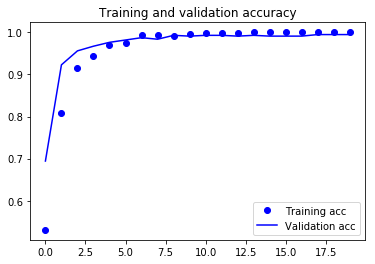

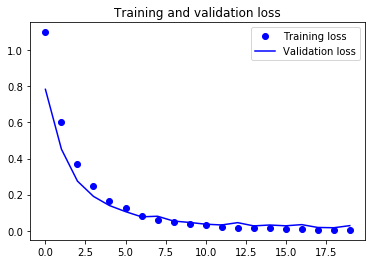

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
model.evaluate(test_features, test_labels)

451/451 [==============================] - 0s 391us/step


[0.009242013915588546, 0.9977827050997783]

In [15]:
model.save('top_layers.h5')